# Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")
from sklearn.preprocessing import MinMaxScaler
#warnings.resetwarnings()

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# 데이터 불러오기

In [3]:
#inter_df = pd.read_csv('/content/drive/MyDrive/2023/최종 프로젝트/data/interaction_ver1.csv')
inter_df = pd.read_csv('/opt/ml/FinalProject/BOJ/data/interaction_ver3.csv')
inter_df

,user_id,problem_id,answer_code,level
0,inu519,2290,0.0,9
1,alsrnwlgp,1753,0.0,12
2,htt0099,10217,0.0,16
3,alsrnwlgp,2239,0.0,12
4,alsrnwlgp,2448,0.0,12
...,...,...,...,...
12226859,ho94949,15279,1.0,3
12226860,ho94949,15295,1.0,3
12226861,ho94949,15340,1.0,3
12226862,ho94949,15415,1.0,3


In [4]:
user_df = pd.read_csv('/opt/ml/FinalProject/BOJ/data/user_ver6.csv')
problem_df = pd.read_csv('/opt/ml/FinalProject/BOJ/data/problem_ver4.csv')

In [5]:
corpor = pd.read_csv('/opt/ml/FinalProject/BOJ/data/corporation.csv')

# EDA

In [6]:
inter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12226870 entries, 0 to 12226869
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      object 
 1   problem_id   int64  
 2   answer_code  float64
 3   level        int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 373.1+ MB


## 기본 Column 정보

In [7]:
inter_df['user_id'].nunique()

79442

In [8]:
inter_df['user_id'].describe()

count     12226870
unique       79442
top       xiaowuc1
freq         10603
Name: user_id, dtype: object

In [9]:
inter_df['problem_id'].nunique()

14276

In [10]:
pd.options.display.float_format = '{:.5f}'.format
inter_df['problem_id'].describe()

count   12226870.00000
mean        7772.09824
std         6460.89571
min         1000.00000
25%         2231.00000
50%         5543.00000
75%        11650.00000
max        28245.00000
Name: problem_id, dtype: float64

In [11]:
inter_df['answer_code'].describe()

count   12226870.00000
mean           0.96195
std            0.19132
min            0.00000
25%            1.00000
50%            1.00000
75%            1.00000
max            1.00000
Name: answer_code, dtype: float64

mean 값을 통해 1이 훨씬 많다는 것을 알 수 있다.

# Preprocessing

In [ ]:
# TODO 1. 중복 추가 제거: 같은 problemId, userId 인데 answerCode가 0,1 모두 존ㄷ재하는 경우, 0인 row를 제거
# TODO 2. user data ver3에 맞게, tier나 조건에 맞지 않는 유저 데이터 row 제거
# TODO 3. problem data ver3에 맞게, 조건에 맞지 않는 문제 데이터 row 제거

## TODO 1

In [7]:
inter_df.shape

(12226864, 4)

In [5]:
inter_df.sort_values(['user_id','problem_id','answer_code'])

,user_id,problem_id,answer_code,level
1006052,000000,1000,1.0,1
8231254,000000,1001,1.0,1
8231255,000000,1008,1.0,1
436750,000000,1017,0.0,18
436708,000000,1067,0.0,20
...,...,...,...,...
4237492,zzzzzzzzu2,15663,1.0,9
4237502,zzzzzzzzu2,15970,1.0,7
4237522,zzzzzzzzu2,17266,1.0,7
4237447,zzzzzzzzu2,18108,1.0,1


In [7]:
test = inter_df[inter_df.duplicated(['user_id','problem_id'],keep=False)] #keep 인자가 False인 경우는 모든 중복 값을 True로 반환한다.
test

,user_id,problem_id,answer_code,level


In [8]:
sorted_inter = inter_df.sort_values(['answer_code'])
sorted_inter[sorted_inter.duplicated(['user_id','problem_id'],keep='first')]

,user_id,problem_id,answer_code,level


중복되는 row가 존재하지 않는다.

## TODO 2

In [9]:
user_df.head()

,user_id,solved_count,follower_count,following_count,max_streak,joined_date,rating
0,000000,38.0,0,4,34,2022-05-12T09:45:54.000Z,95.427444
1,0000000000,1199.0,3,9,385,2021-09-17T23:35:21.000Z,11822.345225
2,000000hj,73.0,0,0,6,2022-09-15T11:15:11.000Z,321.879054
3,0000064,128.0,0,0,0,2021-06-19T00:00:00.000Z,1131.641809
4,0000sb,9.0,0,0,1,2022-01-04T01:41:19.000Z,87.168350


In [6]:
user_df.shape

(79437, 7)

In [18]:
user_df['user_id'].nunique()

79437

In [7]:
user_id = user_df['user_id']
inter_user = pd.merge(user_id, inter_df, on='user_id')
inter_user

,user_id,problem_id,answer_code,level
0,000000,4149,0.0,20
1,000000,1067,0.0,20
2,000000,10430,0.0,1
3,000000,10718,0.0,1
4,000000,10926,0.0,1
...,...,...,...,...
12226859,zzzzzzzzu2,10825,1.0,7
12226860,zzzzzzzzu2,11652,1.0,7
12226861,zzzzzzzzu2,17266,1.0,7
12226862,zzzzzzzzu2,2110,1.0,12


In [8]:
print("기본 interaction dataset에서 ",inter_df.shape[0] - inter_user.shape[0],"개의 interaction가 줄었다.")

기본 interaction dataset에서  0 개의 interaction가 줄었다.


## TODO 3

In [9]:
problem_df

,problem_id,correct_users,level,voted_users,sprout,average_tries
0,1000,246030,1,23,True,2.4865
1,1001,209462,1,12,True,1.4199
2,1002,33034,8,212,False,4.4892
3,1003,44984,8,182,False,3.0839
4,1004,13507,8,122,False,2.1921
...,...,...,...,...,...,...
14273,28240,31,15,13,False,3.2258
14274,28241,14,16,5,False,4.5714
14275,28242,93,9,18,False,1.5376
14276,28243,16,18,7,False,2.1250


In [10]:
problem_id = problem_df['problem_id']
inter_pro = pd.merge(inter_user,problem_id,on='problem_id')
inter_pro

,user_id,problem_id,answer_code,level
0,000000,4149,0.0,20
1,0613antonio,4149,1.0,20
2,0styycp,4149,1.0,20
3,123jhlee,4149,1.0,20
4,1qaz2wsx3edc4rfv,4149,1.0,20
...,...,...,...,...
12226859,yooyou7,4704,1.0,14
12226860,yooyou7,9125,1.0,12
12226861,yup0927,5209,1.0,18
12226862,yup0927,5196,1.0,12


In [11]:
print(f"기본 interaction dataset에서 {inter_df.shape[0]-inter_pro.shape[0]} 개의 row가 줄었다.")
print(f"inter_user dataset에서 {inter_user.shape[0]-inter_pro.shape[0]} 개의 row가 줄었다.")

기본 interaction dataset에서 0 개의 row가 줄었다.
inter_user dataset에서 0 개의 row가 줄었다.


# EDA (merged)

In [12]:
all_merge0 = pd.merge(inter_pro, user_df,on='user_id')
all_merge0

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating
0,000000,4149,0.0,20,38.0,0,4,34,2022-05-12T09:45:54.000Z,95.427444
1,000000,1067,0.0,20,38.0,0,4,34,2022-05-12T09:45:54.000Z,95.427444
2,000000,10430,0.0,1,38.0,0,4,34,2022-05-12T09:45:54.000Z,95.427444
3,000000,10718,0.0,1,38.0,0,4,34,2022-05-12T09:45:54.000Z,95.427444
4,000000,10926,0.0,1,38.0,0,4,34,2022-05-12T09:45:54.000Z,95.427444
...,...,...,...,...,...,...,...,...,...,...
12226859,parsabn,19610,1.0,18,2.0,0,0,0,2021-06-19T00:00:00.000Z,172.382895
12226860,shmilyty,19352,1.0,20,2.0,0,0,1,2023-01-09T09:44:49.000Z,185.550438
12226861,shmilyty,13098,1.0,18,2.0,0,0,1,2023-01-09T09:44:49.000Z,185.550438
12226862,gaji,27490,1.0,16,1.0,8,7,1,2023-03-10T14:47:22.000Z,58.892010


In [13]:
all_merge = pd.merge(all_merge0,problem_df,on='problem_id')
all_merge

,user_id,problem_id,answer_code,level_x,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,level_y,voted_users,sprout,average_tries
0,000000,4149,0.0,20,38.0,0,4,34,2022-05-12T09:45:54.000Z,95.427444,817,20,146,False,6.5789
1,0613antonio,4149,1.0,20,290.0,2,3,51,2021-08-25T08:52:46.000Z,4779.837953,817,20,146,False,6.5789
2,0styycp,4149,1.0,20,567.0,0,0,19,2021-06-19T00:00:00.000Z,11100.827640,817,20,146,False,6.5789
3,123jhlee,4149,1.0,20,1479.0,0,0,8,2021-06-19T00:00:00.000Z,18205.929519,817,20,146,False,6.5789
4,1qaz2wsx3edc4rfv,4149,1.0,20,42.0,0,0,3,2022-09-03T20:32:00.000Z,1014.412745,817,20,146,False,6.5789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12226859,jiangly,26399,1.0,19,199.0,0,6,8,2021-08-12T07:37:24.000Z,11003.994445,3,19,1,False,2.0000
12226860,randomlb,19624,1.0,16,549.0,1,0,15,2021-12-02T00:31:14.000Z,17247.333437,2,16,1,False,1.0000
12226861,larryzhong,19624,1.0,16,147.0,0,0,9,2022-06-12T04:09:42.000Z,9870.114315,2,16,1,False,1.0000
12226862,randomlb,17331,1.0,19,549.0,1,0,15,2021-12-02T00:31:14.000Z,17247.333437,2,19,2,False,1.0000


In [14]:
all_merge = all_merge.drop(columns='level_y')
all_merge.rename(columns={'level_x':'level'},inplace=True)
all_merge

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,voted_users,sprout,average_tries
0,000000,4149,0.0,20,38.0,0,4,34,2022-05-12T09:45:54.000Z,95.427444,817,146,False,6.5789
1,0613antonio,4149,1.0,20,290.0,2,3,51,2021-08-25T08:52:46.000Z,4779.837953,817,146,False,6.5789
2,0styycp,4149,1.0,20,567.0,0,0,19,2021-06-19T00:00:00.000Z,11100.827640,817,146,False,6.5789
3,123jhlee,4149,1.0,20,1479.0,0,0,8,2021-06-19T00:00:00.000Z,18205.929519,817,146,False,6.5789
4,1qaz2wsx3edc4rfv,4149,1.0,20,42.0,0,0,3,2022-09-03T20:32:00.000Z,1014.412745,817,146,False,6.5789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12226859,jiangly,26399,1.0,19,199.0,0,6,8,2021-08-12T07:37:24.000Z,11003.994445,3,1,False,2.0000
12226860,randomlb,19624,1.0,16,549.0,1,0,15,2021-12-02T00:31:14.000Z,17247.333437,2,1,False,1.0000
12226861,larryzhong,19624,1.0,16,147.0,0,0,9,2022-06-12T04:09:42.000Z,9870.114315,2,1,False,1.0000
12226862,randomlb,17331,1.0,19,549.0,1,0,15,2021-12-02T00:31:14.000Z,17247.333437,2,2,False,1.0000


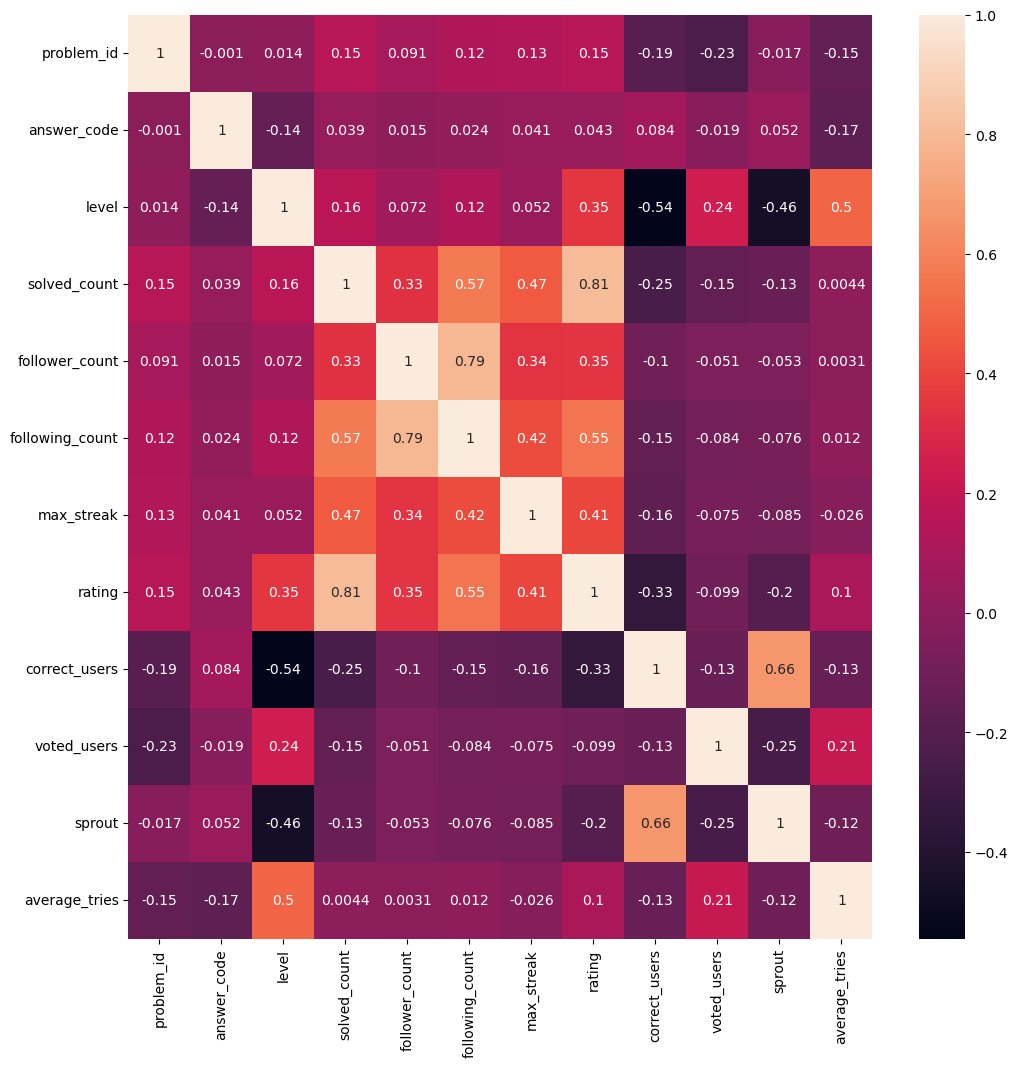

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(all_merge.corr(),annot=True,ax=ax)
plt.show()

## level별 유저 rating 분포

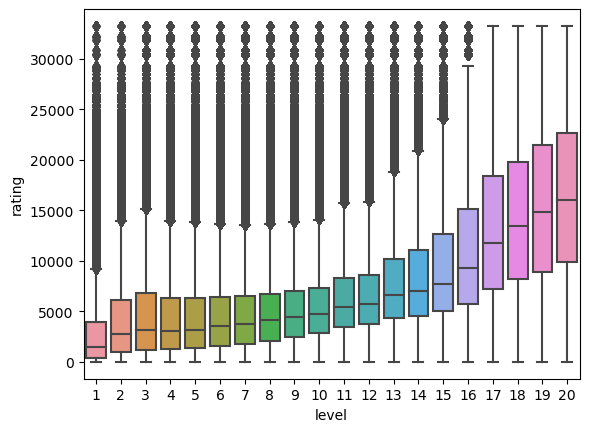

In [20]:
sns.boxplot(x='level',y='rating',data=all_merge)
plt.show()

# EDA (corporation-tags)

In [18]:
corpor

,user_id,corporation_name
0,woonikim,kt
1,gyunghoe,kt
2,jaimemin,kt
3,skaguq4270,kt
4,zealtez,kt
...,...,...
749,emevoluoyod,쿠팡
750,rokuta1059,쿠팡
751,da3107,쿠팡
752,idelen,쿠팡


In [15]:
corpor['user_id'].nunique()

695

2개 이상의 기업에 소속된 user가 존재한다.

In [16]:
corpor[corpor['user_id'].duplicated(keep=False)].sort_values('user_id')

,user_id,corporation_name
28,TAMREF,몰로코
42,TAMREF,에어스메디컬
605,WeissBlume,카카오
716,WeissBlume,뤼이드
151,adzoo,네이버
...,...,...
157,wonderjune,네이버
0,woonikim,kt
103,woonikim,네이버
338,xeuskr,삼성SDS


time 데이터가 없어서 따로 처리가 어려울 것 같다.

In [69]:
corpor['corporation_name'].unique()

array(['kt', '그렙', '몰로코', '에어스메디컬', '튜링', 'LG_CNS', '네이버', '버킷플레이스',
       '엔씨소프트', '현대_오토에버', 'LG전자', '넥슨', '삼성SDS', '엔진스튜디오', '현대모비스',
       'sk하이닉스', '라인플러스', '삼성전자', '카카오', '구글', '뤼이드', '샌드버드', '쿠팡'],
      dtype=object)

In [17]:
cnt_corpor = corpor.groupby('corporation_name').count().sort_values('user_id',ascending=False)
cnt_corpor

,user_id
corporation_name,
삼성전자,193
카카오,101
네이버,68
삼성SDS,68
LG_CNS,47
LG전자,42
넥슨,29
쿠팡,27
라인플러스,26


In [32]:
cnt_corpor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 삼성전자 to 에어스메디컬
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  23 non-null     int64
dtypes: int64(1)
memory usage: 368.0+ bytes


In [18]:
corpor_top6 = corpor[corpor['corporation_name'].isin(['삼성전자','카카오','네이버','삼성SDS','LG_CNS','LG전자'])]
corpor_top6

,user_id,corporation_name
47,nuclear852,LG_CNS
48,cdw2241,LG_CNS
49,dlstj0923,LG_CNS
50,ak3243,LG_CNS
51,young920503,LG_CNS
...,...,...
701,coodingpenguin,카카오
702,kcoms555,카카오
703,dev5igner,카카오
704,justgu,카카오


In [19]:
user_corpor = pd.merge(user_df, corpor_top6, on='user_id')
user_corpor

,user_id,solved_count,follower_count,following_count,max_streak,joined_date,rating,corporation_name
0,0106658lee,318.0,0,0,1,2021-06-19T00:00:00.000Z,5660.938037,삼성SDS
1,1_0,264.0,2,1,5,2021-06-19T00:00:00.000Z,5388.388598,LG전자
2,42_jakang,249.0,6,6,1,2021-06-19T00:00:00.000Z,7308.084409,삼성전자
3,483759,661.0,3,3,4,2021-06-19T00:00:00.000Z,8160.311520,카카오
4,4z7l,162.0,0,3,1,2021-06-19T00:00:00.000Z,4790.635287,네이버
...,...,...,...,...,...,...,...,...
474,yskang,498.0,0,1,2,2021-06-19T00:00:00.000Z,8766.032564,LG전자
475,yunsubaek,540.0,0,0,1,2022-07-07T06:57:59.000Z,6146.174939,삼성전자
476,zakelstorm,445.0,0,0,9,2021-06-19T00:00:00.000Z,6165.008416,삼성전자
477,zezs3535,518.0,2,1,6,2021-06-19T00:00:00.000Z,6180.798134,LG_CNS


In [20]:
all_merge_corpor = pd.merge(all_merge,corpor_top6,on='user_id')
all_merge_corpor.head()

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,voted_users,sprout,average_tries,corporation_name
0,MenOfPassion,4149,1.0,20,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,817,146,False,6.5789,삼성전자
1,MenOfPassion,10430,1.0,1,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,148059,5,False,1.8965,삼성전자
2,MenOfPassion,10718,1.0,1,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,176145,5,False,1.5410,삼성전자
3,MenOfPassion,10926,1.0,1,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,81198,4,False,1.9531,삼성전자
4,MenOfPassion,25186,1.0,9,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,229,26,False,4.0393,삼성전자


In [70]:
all_merge_corpor.shape

(305961, 15)

## middle tag, big tag rating

In [196]:
user_btag_rating = pd.read_csv('/opt/ml/FinalProject/BOJ/data/user_rating_big_ver1.csv')
user_btag_rating

,user_id,tree,datastructure,graph,hash,search,dp,greedy,math,bruteforce,recursion,basics
0,000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.918528,0.000000,0.000000,76.508916
1,0000000000,345.597181,2550.999264,1915.707205,627.323171,450.987999,700.271998,411.120719,1053.829565,467.295066,1068.589507,2230.623552
2,000000hj,0.000000,0.000000,0.000000,0.000000,0.000000,25.692763,7.566621,89.229850,13.785531,0.000000,185.604290
3,0000064,0.000000,30.266483,151.079798,57.837544,28.918772,61.408159,35.230273,178.824191,82.742422,67.103013,438.231154
4,0000sb,0.000000,0.000000,15.133241,0.000000,0.000000,0.000000,0.000000,13.729560,0.000000,0.000000,58.305548
...,...,...,...,...,...,...,...,...,...,...,...,...
79432,zzzzong123,0.000000,40.914820,0.000000,0.000000,0.000000,0.000000,12.589254,1.000000,0.000000,0.000000,29.722495
79433,zzzzz9887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.660571,0.000000,0.000000,53.511169
79434,zzzzzzzbob,0.000000,0.000000,29.335251,0.000000,0.000000,7.566621,27.722495,51.851544,5.000000,0.000000,112.730832
79435,zzzzzzzz,0.000000,202.995968,242.769861,0.000000,40.639023,156.246294,119.561560,372.390823,43.732087,84.070518,493.960807


## 함수 정리

In [73]:
def show_rating(df):
    fig, ax = plt.subplots(figsize=(12,8))

    sns.distplot(all_merge['rating'],ax=ax)
    sns.distplot(df['rating'],ax=ax,color='r')
    #plt.ylim(0,0.0018)

    plt.show()
    return 

In [74]:
def show_rating_count(df):
    fig, ax = plt.subplots(figsize=(12,8))

    sns.histplot(all_merge['rating'],ax=ax)
    sns.histplot(df['rating'],ax=ax,color='r')

    plt.show()

In [146]:
def corpor_mtag_user_rating_df(df):
    corpor_mtag = user_mtag_rating[user_mtag_rating['user_id'].isin(df['user_id'].unique()) == True]
    
    tmp = corpor_mtag.drop(columns='user_id')
    
    corpor_mtag_tmp = pd.DataFrame(columns=['user_id','mtag','rating'])
    corpor_mtag_tmp['user_id'] = corpor_mtag['user_id']
    corpor_mtag_tmp = corpor_mtag_tmp.loc[corpor_mtag_tmp.index.repeat(26)].reset_index(drop=True)

    mtags = list(user_mtag_rating.columns[1:])

    corpor_mtag_tmp['mtag'] = [mtags[i %26] for i in range(len(corpor_mtag_tmp))]

    corpor_mtag_tmp['rating'] = tmp.values.flatten()
    return corpor_mtag_tmp

In [197]:
def corpor_btag_user_rating_df(df):
    corpor_btag = user_btag_rating[user_btag_rating['user_id'].isin(df['user_id'].unique()) == True]
    
    tmp = corpor_btag.drop(columns='user_id')
    
    corpor_btag_tmp = pd.DataFrame(columns=['user_id','btag','rating'])
    corpor_btag_tmp['user_id'] = corpor_btag['user_id']
    corpor_btag_tmp = corpor_btag_tmp.loc[corpor_btag_tmp.index.repeat(11)].reset_index(drop=True)

    btags = list(user_btag_rating.columns[1:])

    corpor_btag_tmp['btag'] = [btags[i %11] for i in range(len(corpor_btag_tmp))]

    corpor_btag_tmp['rating'] = tmp.values.flatten()
    return corpor_btag_tmp

In [154]:
def get_specific_user_mtag_rating(user_id):
    user_mtag_df = user_mtag_rating[user_mtag_rating['user_id']==user_id]
    user_mtag_df = user_mtag_df.T
    user_mtag_df.reset_index(inplace=True)
    user_mtag_df = user_mtag_df.drop(index=0)
    user_mtag_df.columns=['mtag','rating']
    return user_mtag_df

In [198]:
def get_specific_user_btag_rating(user_id):
    user_btag_df = user_btag_rating[user_btag_rating['user_id']==user_id]
    user_btag_df = user_btag_df.T
    user_btag_df.reset_index(inplace=True)
    user_btag_df = user_btag_df.drop(index=0)
    user_btag_df.columns=['btag','rating']
    return user_btag_df

In [213]:
def get_q1_mtag_rating(df):
    q1 = df.groupby('mtag').quantile(0.25)
    q1.reset_index(inplace=True)
    #q1 = q1.sort_values('rating',ascending=False)
    return q1

In [214]:
def get_q1_btag_rating(df):
    q1 = df.groupby('btag').quantile(0.25)
    q1.reset_index(inplace=True)
    #q1 = q1.sort_values('rating',ascending=False)
    return q1

In [175]:
def show_mtag_barplot(df):
    data = corpor_mtag_user_rating_df(df)
    
    jh = get_specific_user_mtag_rating('junhyuk1229')
    kj = get_specific_user_mtag_rating('kkj9818')
    hj = get_specific_user_mtag_rating('ghwns82')
    
    q1_df = get_q1_mtag_rating(data)
    
    ax = sns.barplot(x='mtag',y='rating',data=q1_df)
    sns.scatterplot(data=jh,x='mtag',y='rating',ax=ax,color='red')
    sns.scatterplot(data=kj,x='mtag',y='rating',ax=ax,color='orange')
    sns.scatterplot(data=hj,x='mtag',y='rating',ax=ax,color='pink')
    plt.xticks(rotation=90)
    plt.show()
    return
    

In [227]:
def show_btag_barplot(df):
    data = corpor_btag_user_rating_df(df)
    
    jh = get_specific_user_btag_rating('junhyuk1229')
    kj = get_specific_user_btag_rating('kkj9818')
    hj = get_specific_user_btag_rating('ghwns82')
    
    q1_df = get_q1_btag_rating(data)
    
    ax = sns.barplot(x='btag',y='rating',data=q1_df)
    sns.scatterplot(data=jh,x='btag',y='rating',ax=ax,color='red')
    sns.scatterplot(data=kj,x='btag',y='rating',ax=ax,color='orange')
    sns.scatterplot(data=hj,x='btag',y='rating',ax=ax,color='pink')
    plt.xticks(rotation=90)
    plt.show()
    return
    

## 1. 삼성전자

In [38]:
#samsung_ele = ALL_MERGE[ALL_MERGE['corporation_name']=='삼성전자']
samsung_ele = all_merge_corpor[all_merge_corpor['corporation_name']=='삼성전자']
samsung_ele

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,voted_users,sprout,average_tries,corporation_name,mtag
0,MenOfPassion,4149,1.0,20,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,817,146,False,6.5789,삼성전자,
1,MenOfPassion,10430,1.0,1,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,148059,5,False,1.8965,삼성전자,
2,MenOfPassion,10718,1.0,1,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,176145,5,False,1.5410,삼성전자,
3,MenOfPassion,10926,1.0,1,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,81198,4,False,1.9531,삼성전자,
4,MenOfPassion,25186,1.0,9,3259.0,0,19,11,2021-06-19T00:00:00.000Z,24581.670251,229,26,False,4.0393,삼성전자,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305952,mindole5029,1977,1.0,4,6.0,0,0,1,2023-02-15T05:20:25.000Z,163.302152,12765,66,False,2.0571,삼성전자,
305953,mindole5029,1715,1.0,12,6.0,0,0,1,2023-02-15T05:20:25.000Z,163.302152,13431,141,False,2.9745,삼성전자,
305954,mindole5029,1408,1.0,4,6.0,0,0,1,2023-02-15T05:20:25.000Z,163.302152,4236,43,False,2.1761,삼성전자,
305955,mindole5029,5635,1.0,6,6.0,0,0,1,2023-02-15T05:20:25.000Z,163.302152,5552,43,False,1.4517,삼성전자,


### rating_problem 분포

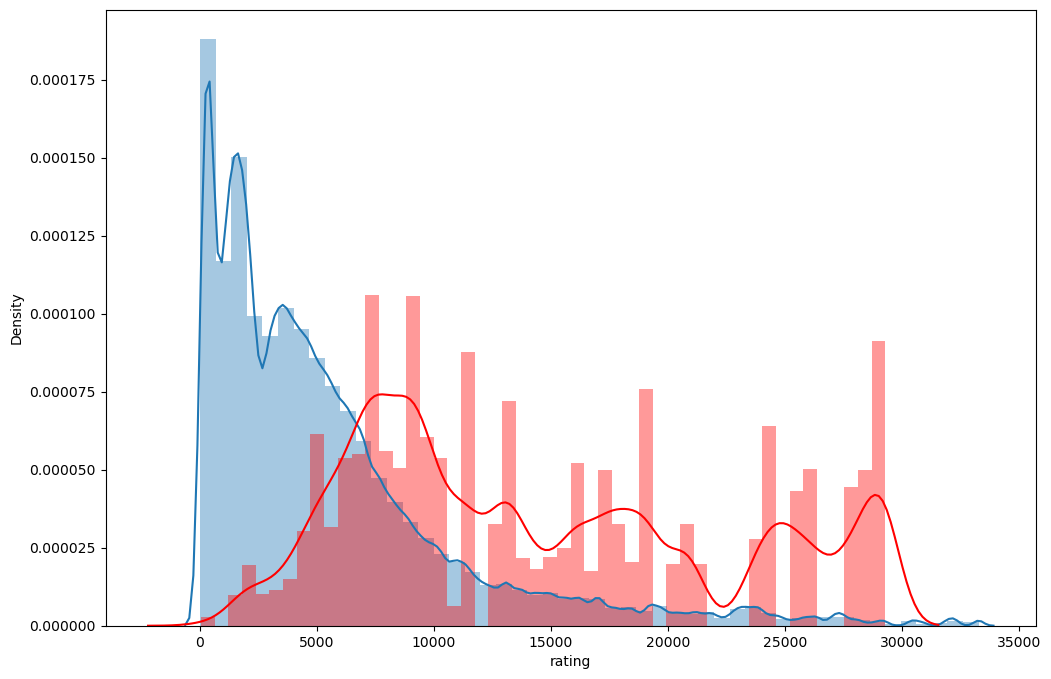

In [76]:
show_rating(samsung_ele)

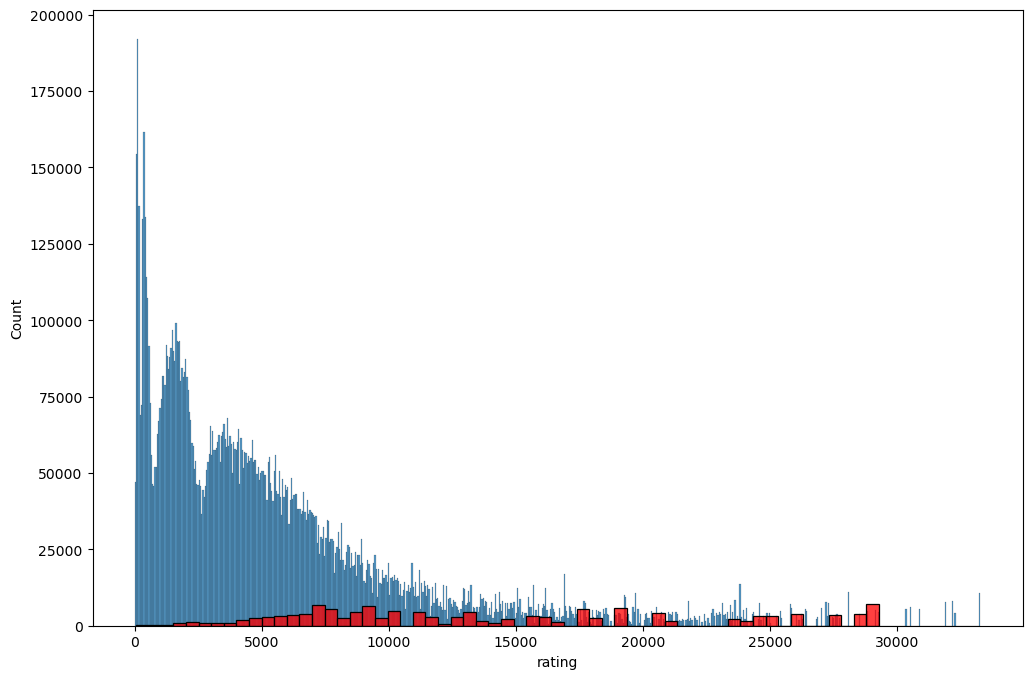

In [78]:
show_rating_count(samsung_ele)

### tags별 분포

tag별 rating이 있으므로 tag별 count는 더 이상 유의미한 정보가 아닌 것 같다,,,

#### mtag 기준 (user_mtag_rating)

In [41]:
user_mtag_rating = pd.read_csv('/opt/ml/FinalProject/BOJ/data/user_rating_middle_ver1.csv')
user_mtag_rating

,user_id,bfs,binary_search,bruteforcing,deque,dfs,disjoint_set,divide_and_conquer,dp,graphs,...,queue,recursion,segtree,sorting,stack,string,ternary_search,tree_set,trees,two_pointer
0,000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.809148,0.000000,8.890620,0.000000,0.000000,0.000000,0.000000
1,0000000000,504.944812,391.019803,467.295066,71.472882,499.804093,267.811457,467.185273,700.271998,910.958299,...,51.767374,601.404234,1117.343568,1014.976299,311.596034,762.243446,29.446005,393.558816,345.597181,136.166287
2,000000hj,0.000000,0.000000,13.785531,0.000000,0.000000,0.000000,0.000000,25.692763,0.000000,...,0.000000,0.000000,0.000000,86.171096,0.000000,18.481007,0.000000,0.000000,0.000000,0.000000
3,0000064,59.445559,28.918772,82.742422,0.000000,32.188680,0.000000,27.256879,61.408159,59.445559,...,7.566621,39.846134,15.133241,206.428797,0.000000,71.414291,0.000000,28.918772,0.000000,7.566621
4,0000sb,0.000000,0.000000,0.000000,0.000000,7.566621,0.000000,0.000000,0.000000,7.566621,...,0.000000,0.000000,0.000000,29.152774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79432,zzzzong123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.566621,0.000000,33.348200,21.155875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
79433,zzzzz9887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,26.755585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
79434,zzzzzzzbob,14.667625,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,7.566621,14.667625,...,0.000000,0.000000,0.000000,59.160043,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
79435,zzzzzzzz,51.041240,40.639023,43.732087,7.566621,38.451985,46.438870,42.035259,156.246294,153.276636,...,15.133241,42.035259,101.497984,262.456635,32.359252,20.281981,0.000000,0.000000,0.000000,0.000000


In [42]:
samsung_ele_mtag = user_mtag_rating[user_mtag_rating['user_id'].isin(samsung_ele['user_id'].unique()) == True]
samsung_ele_mtag

,user_id,bfs,binary_search,bruteforcing,deque,dfs,disjoint_set,divide_and_conquer,dp,graphs,...,queue,recursion,segtree,sorting,stack,string,ternary_search,tree_set,trees,two_pointer
1190,42_jakang,477.773652,329.829186,548.089205,16.992866,271.220607,221.141595,131.859214,690.903312,675.713843,...,24.559486,164.823020,578.745147,717.417344,24.559486,350.707200,14.667625,101.720265,180.574866,62.995726
1680,MenOfPassion,965.792405,1280.955666,897.902222,356.053991,1034.229201,1027.685081,881.374975,1352.125446,1326.282877,...,200.361445,922.252248,1462.278566,1230.104534,633.981419,707.578332,115.124136,948.839808,1272.710682,811.075232
1883,aahcbird,497.486616,122.956042,433.167640,77.736187,296.749839,54.173372,100.345454,481.202730,593.453092,...,54.974709,153.246388,544.892394,615.371002,152.642291,215.345775,0.000000,28.918772,86.750550,72.887587
2337,aeren,409.691125,878.532420,575.035719,107.626098,551.086459,459.766715,478.479808,1323.001420,1181.084119,...,12.589254,540.326134,1328.798952,1145.183359,230.643060,535.736364,49.129121,584.294478,1063.189782,456.886677
2543,ahsahs3,465.725104,282.932153,474.883038,7.566621,287.602229,120.369344,54.624513,708.414877,694.881489,...,24.196312,88.672887,578.441207,491.191372,188.450115,220.773748,29.446005,48.865033,62.824561,99.147795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77467,young951124,180.105141,25.862801,202.764433,0.000000,68.227310,0.000000,39.846134,262.621629,197.098007,...,13.785531,52.435388,35.972331,221.010105,22.186800,14.620180,0.000000,7.566621,0.000000,0.000000
77755,yshinobu,122.763425,44.993495,92.800685,0.000000,63.846054,0.000000,72.777593,158.467712,184.531108,...,0.000000,72.777593,71.276560,242.744774,7.566621,88.672080,0.000000,11.457240,0.000000,34.263935
78280,yunsubaek,468.922988,211.363986,406.661654,33.622557,311.383042,114.849328,0.000000,697.162267,618.849765,...,43.367650,46.637628,516.589997,512.944494,126.606135,239.862693,0.000000,108.636167,65.354073,54.145919
78584,zakelstorm,461.265075,205.746629,406.833138,26.055937,246.683375,0.000000,242.630078,699.634315,578.829193,...,54.974709,253.359638,413.432655,503.168295,105.884500,229.676056,0.000000,57.371928,59.024020,42.238687


In [234]:
samsung_ele_btag = user_btag_rating[user_btag_rating['user_id'].isin(samsung_ele['user_id'].unique()) == True]
samsung_ele_btag

,user_id,tree,datastructure,graph,hash,search,dp,greedy,math,bruteforce,recursion,basics
1190,42_jakang,180.574866,1103.264213,1424.708102,203.440530,457.556679,690.903312,303.786915,370.330684,600.048091,296.682234,1676.788783
1680,MenOfPassion,1272.710682,6378.062404,3326.304483,1612.474630,2245.167428,1352.125446,1249.738710,1290.103280,1119.508104,1803.627223,2931.847862
1883,aahcbird,86.750550,1230.066723,1387.689547,57.837544,192.983979,481.202730,190.836157,466.687663,455.680521,253.591842,1418.063862
2337,aeren,1063.189782,3022.479151,2141.861703,858.541080,1214.301388,1323.001420,1076.758827,1290.103280,575.035719,1018.805942,2466.034161
2543,ahsahs3,62.824561,1346.086938,1448.208823,97.730065,378.002484,708.414877,386.154216,505.876493,474.883038,143.297400,1044.311389
...,...,...,...,...,...,...,...,...,...,...,...,...
77467,young951124,0.000000,71.944662,445.430458,15.133241,36.592361,262.621629,15.133241,233.155541,202.764433,92.281521,424.320348
77755,yshinobu,0.000000,113.107116,371.140587,22.914481,55.723055,158.467712,29.446005,272.301106,92.800685,145.555186,482.229454
78280,yunsubaek,65.354073,1106.369733,1399.155795,217.272334,255.335987,697.162267,319.626722,405.172374,471.948980,46.637628,1162.139046
78584,zakelstorm,59.024020,838.877233,1286.777642,114.743856,275.774567,699.634315,215.979384,623.125630,406.833138,495.989715,1148.248916


In [94]:
mtags = list(user_mtag_rating.columns[1:])
mtags

['bfs',
 'binary_search',
 'bruteforcing',
 'deque',
 'dfs',
 'disjoint_set',
 'divide_and_conquer',
 'dp',
 'graphs',
 'greedy',
 'hashing',
 'implementation',
 'math',
 'mitm',
 'parametric_search',
 'priority_queue',
 'queue',
 'recursion',
 'segtree',
 'sorting',
 'stack',
 'string',
 'ternary_search',
 'tree_set',
 'trees',
 'two_pointer']

In [235]:
btags = list(user_btag_rating.columns[1:])
btags

['tree',
 'datastructure',
 'graph',
 'hash',
 'search',
 'dp',
 'greedy',
 'math',
 'bruteforce',
 'recursion',
 'basics']

In [105]:
tmp = samsung_ele_mtag.drop(columns='user_id')
tmp

,bfs,binary_search,bruteforcing,deque,dfs,disjoint_set,divide_and_conquer,dp,graphs,greedy,...,queue,recursion,segtree,sorting,stack,string,ternary_search,tree_set,trees,two_pointer
1190,477.773652,329.829186,548.089205,16.992866,271.220607,221.141595,131.859214,690.903312,675.713843,303.786915,...,24.559486,164.823020,578.745147,717.417344,24.559486,350.707200,14.667625,101.720265,180.574866,62.995726
1680,965.792405,1280.955666,897.902222,356.053991,1034.229201,1027.685081,881.374975,1352.125446,1326.282877,1249.738710,...,200.361445,922.252248,1462.278566,1230.104534,633.981419,707.578332,115.124136,948.839808,1272.710682,811.075232
1883,497.486616,122.956042,433.167640,77.736187,296.749839,54.173372,100.345454,481.202730,593.453092,190.836157,...,54.974709,153.246388,544.892394,615.371002,152.642291,215.345775,0.000000,28.918772,86.750550,72.887587
2337,409.691125,878.532420,575.035719,107.626098,551.086459,459.766715,478.479808,1323.001420,1181.084119,1076.758827,...,12.589254,540.326134,1328.798952,1145.183359,230.643060,535.736364,49.129121,584.294478,1063.189782,456.886677
2543,465.725104,282.932153,474.883038,7.566621,287.602229,120.369344,54.624513,708.414877,694.881489,386.154216,...,24.196312,88.672887,578.441207,491.191372,188.450115,220.773748,29.446005,48.865033,62.824561,99.147795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77467,180.105141,25.862801,202.764433,0.000000,68.227310,0.000000,39.846134,262.621629,197.098007,15.133241,...,13.785531,52.435388,35.972331,221.010105,22.186800,14.620180,0.000000,7.566621,0.000000,0.000000
77755,122.763425,44.993495,92.800685,0.000000,63.846054,0.000000,72.777593,158.467712,184.531108,29.446005,...,0.000000,72.777593,71.276560,242.744774,7.566621,88.672080,0.000000,11.457240,0.000000,34.263935
78280,468.922988,211.363986,406.661654,33.622557,311.383042,114.849328,0.000000,697.162267,618.849765,319.626722,...,43.367650,46.637628,516.589997,512.944494,126.606135,239.862693,0.000000,108.636167,65.354073,54.145919
78584,461.265075,205.746629,406.833138,26.055937,246.683375,0.000000,242.630078,699.634315,578.829193,215.979384,...,54.974709,253.359638,413.432655,503.168295,105.884500,229.676056,0.000000,57.371928,59.024020,42.238687


In [236]:
tmp = samsung_ele_btag.drop(columns='user_id')
tmp

,tree,datastructure,graph,hash,search,dp,greedy,math,bruteforce,recursion,basics
1190,180.574866,1103.264213,1424.708102,203.440530,457.556679,690.903312,303.786915,370.330684,600.048091,296.682234,1676.788783
1680,1272.710682,6378.062404,3326.304483,1612.474630,2245.167428,1352.125446,1249.738710,1290.103280,1119.508104,1803.627223,2931.847862
1883,86.750550,1230.066723,1387.689547,57.837544,192.983979,481.202730,190.836157,466.687663,455.680521,253.591842,1418.063862
2337,1063.189782,3022.479151,2141.861703,858.541080,1214.301388,1323.001420,1076.758827,1290.103280,575.035719,1018.805942,2466.034161
2543,62.824561,1346.086938,1448.208823,97.730065,378.002484,708.414877,386.154216,505.876493,474.883038,143.297400,1044.311389
...,...,...,...,...,...,...,...,...,...,...,...
77467,0.000000,71.944662,445.430458,15.133241,36.592361,262.621629,15.133241,233.155541,202.764433,92.281521,424.320348
77755,0.000000,113.107116,371.140587,22.914481,55.723055,158.467712,29.446005,272.301106,92.800685,145.555186,482.229454
78280,65.354073,1106.369733,1399.155795,217.272334,255.335987,697.162267,319.626722,405.172374,471.948980,46.637628,1162.139046
78584,59.024020,838.877233,1286.777642,114.743856,275.774567,699.634315,215.979384,623.125630,406.833138,495.989715,1148.248916


In [109]:
samsung_ele_mtag_tmp = pd.DataFrame(columns=['user_id','mtag','rating'])
samsung_ele_mtag_tmp['user_id'] = samsung_ele_mtag['user_id']
samsung_ele_mtag_tmp = samsung_ele_mtag_tmp.loc[samsung_ele_mtag_tmp.index.repeat(26)].reset_index(drop=True)

samsung_ele_mtag_tmp['mtag'] = [mtags[i %26] for i in range(len(samsung_ele_mtag_tmp))]

samsung_ele_mtag_tmp['rating'] = tmp.values.flatten()
samsung_ele_mtag_tmp

,user_id,mtag,rating
0,42_jakang,bfs,477.773652
1,42_jakang,binary_search,329.829186
2,42_jakang,bruteforcing,548.089205
3,42_jakang,deque,16.992866
4,42_jakang,dfs,271.220607
...,...,...,...
4571,zych1751,string,1188.959237
4572,zych1751,ternary_search,196.781968
4573,zych1751,tree_set,1015.502390
4574,zych1751,trees,1289.474262


In [239]:
samsung_ele_btag_tmp = pd.DataFrame(columns=['user_id','btag','rating'])
samsung_ele_btag_tmp['user_id'] = samsung_ele_btag['user_id']
samsung_ele_btag_tmp = samsung_ele_btag_tmp.loc[samsung_ele_btag_tmp.index.repeat(11)].reset_index(drop=True)

samsung_ele_btag_tmp['btag'] = [btags[i %11] for i in range(len(samsung_ele_btag_tmp))]

samsung_ele_btag_tmp['rating'] = tmp.values.flatten()
samsung_ele_btag_tmp

,user_id,btag,rating
0,42_jakang,tree,180.574866
1,42_jakang,datastructure,1103.264213
2,42_jakang,graph,1424.708102
3,42_jakang,hash,203.440530
4,42_jakang,search,457.556679
...,...,...,...
1931,zych1751,greedy,1173.057293
1932,zych1751,math,1398.505707
1933,zych1751,bruteforce,1359.316849
1934,zych1751,recursion,2019.976797


In [148]:
corpor_mtag_user_rating_df(samsung_ele) #위와 같은 코드

,user_id,mtag,rating
0,42_jakang,bfs,477.773652
1,42_jakang,binary_search,329.829186
2,42_jakang,bruteforcing,548.089205
3,42_jakang,deque,16.992866
4,42_jakang,dfs,271.220607
...,...,...,...
4571,zych1751,string,1188.959237
4572,zych1751,ternary_search,196.781968
4573,zych1751,tree_set,1015.502390
4574,zych1751,trees,1289.474262


In [240]:
data=corpor_btag_user_rating_df(samsung_ele)
data

,user_id,btag,rating
0,42_jakang,tree,180.574866
1,42_jakang,datastructure,1103.264213
2,42_jakang,graph,1424.708102
3,42_jakang,hash,203.440530
4,42_jakang,search,457.556679
...,...,...,...
1931,zych1751,greedy,1173.057293
1932,zych1751,math,1398.505707
1933,zych1751,bruteforce,1359.316849
1934,zych1751,recursion,2019.976797


In [209]:
jh = get_specific_user_btag_rating('junhyuk1229')
kj = get_specific_user_btag_rating('kkj9818')
hj = get_specific_user_btag_rating('ghwns82')
jh.sort_values()

,btag,rating
1,tree,37.986439
2,datastructure,648.776636
3,graph,880.177419
4,hash,192.435066
5,search,64.270391
6,dp,398.278973
7,greedy,147.492501
8,math,386.770431
9,bruteforce,378.3936
10,recursion,218.473138


In [242]:
q1_df = data.groupby('btag').quantile(0.25)
q1_df.reset_index(inplace=True)
q1_df

,btag,rating
0,basics,1109.907481
1,bruteforce,349.011826
2,datastructure,540.131216
3,dp,403.564524
4,graph,1079.447857
5,greedy,89.815435
6,hash,72.296930
7,math,284.115487
8,recursion,115.376733
9,search,144.028042


In [232]:
q1_df = get_q1_btag_rating(data)
q1_df

,btag,rating
0,basics,1109.907481
1,bruteforce,349.011826
2,datastructure,540.131216
3,dp,403.564524
4,graph,1079.447857
5,greedy,89.815435
6,hash,72.296930
7,math,284.115487
8,recursion,115.376733
9,search,144.028042


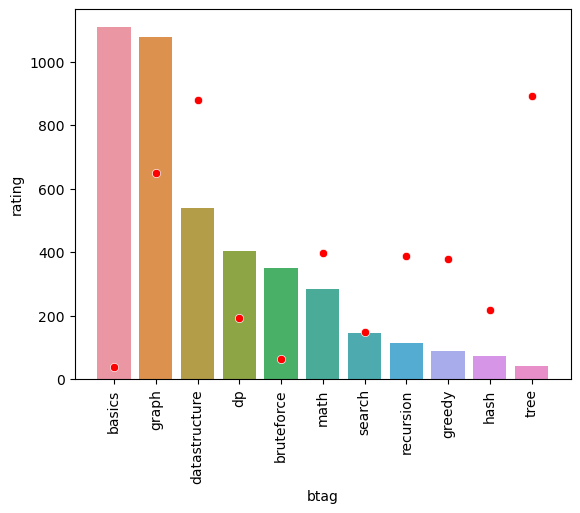

In [210]:
ax = sns.barplot(x='btag',y='rating',data=q1_df)
sns.scatterplot(data=jh,x='btag',y='rating',ax=ax,color='red')
# sns.scatterplot(data=kj,x='btag',y='rating',ax=ax,color='orange')
# sns.scatterplot(data=hj,x='btag',y='rating',ax=ax,color='pink')
plt.xticks(rotation=90)
plt.show()

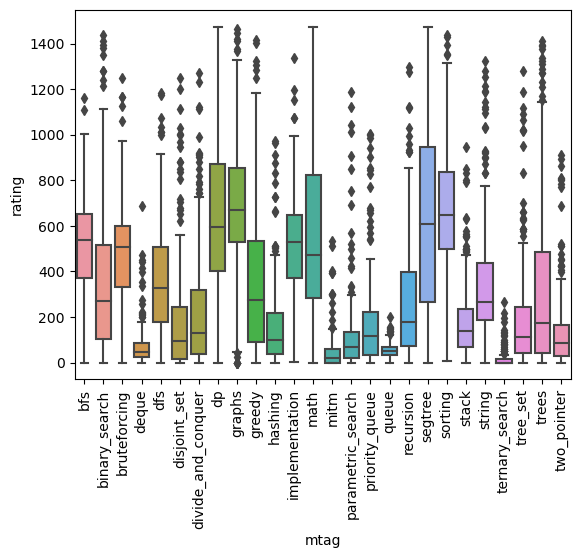

In [112]:
sns.boxplot(x='mtag',y='rating',data=samsung_ele_mtag_tmp)
plt.xticks(rotation=90)
plt.show()

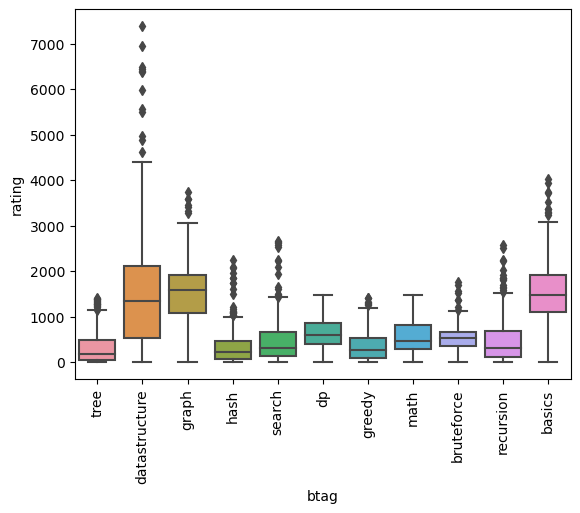

In [203]:
sns.boxplot(x='btag',y='rating',data=corpor_btag_user_rating_df(samsung_ele))
plt.xticks(rotation=90)
plt.show()

junhyuk1229

In [155]:
get_specific_user_mtag_rating('junhyuk1229')

,mtag,rating
1,bfs,311.804191
2,binary_search,42.811271
3,bruteforcing,378.3936
4,deque,31.297317
5,dfs,157.536309
6,disjoint_set,0.0
7,divide_and_conquer,73.894508
8,dp,398.278973
9,graphs,410.836919
10,greedy,147.492501


In [204]:
get_specific_user_btag_rating('junhyuk1229')

,btag,rating
1,tree,37.986439
2,datastructure,648.776636
3,graph,880.177419
4,hash,192.435066
5,search,64.270391
6,dp,398.278973
7,greedy,147.492501
8,math,386.770431
9,bruteforce,378.3936
10,recursion,218.473138


##### 기업별 유저 rating: mean

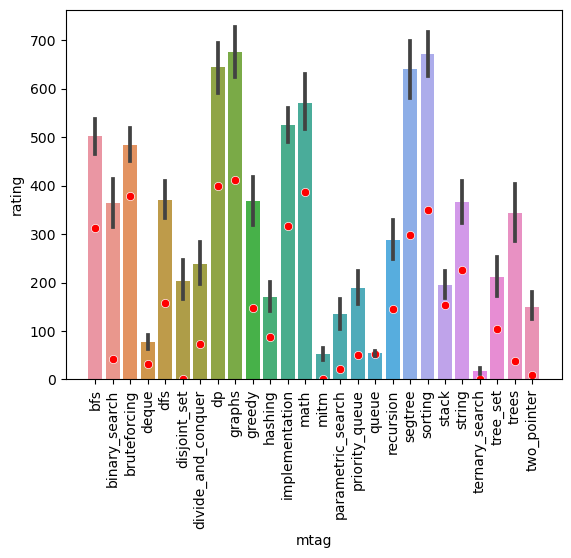

In [132]:
ax = sns.barplot(x='mtag',y='rating',data=samsung_ele_mtag_tmp)
sns.scatterplot(data=junhyuk_mtag,x='mtag',y='rating',ax=ax,color='red')
plt.xticks(rotation=90)
plt.show()

In [157]:
samsung_user = get_specific_user_mtag_rating('42_jakang')
samsung_user

,mtag,rating
1,bfs,477.773652
2,binary_search,329.829186
3,bruteforcing,548.089205
4,deque,16.992866
5,dfs,271.220607
6,disjoint_set,221.141595
7,divide_and_conquer,131.859214
8,dp,690.903312
9,graphs,675.713843
10,greedy,303.786915


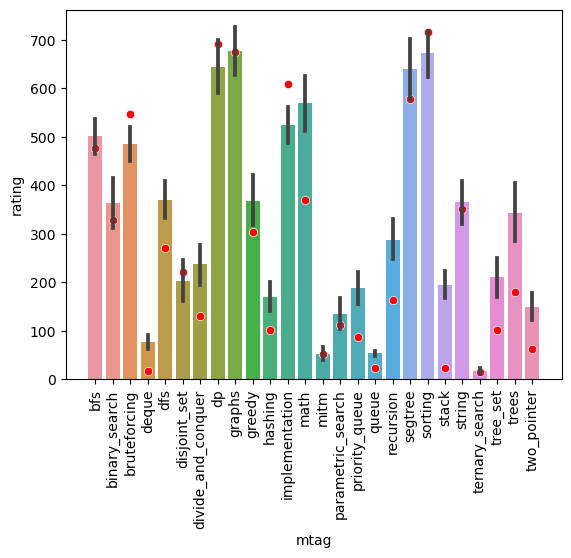

In [158]:
ax = sns.barplot(x='mtag',y='rating',data=samsung_ele_mtag_tmp)
sns.scatterplot(data=samsung_user,x='mtag',y='rating',ax=ax,color='red')
plt.xticks(rotation=90)
plt.show()

#### 기업별 유저 rating: Q1

In [162]:
kkj = get_specific_user_mtag_rating('kkj9818')
kkj

,mtag,rating
1,bfs,328.581495
2,binary_search,104.829899
3,bruteforcing,212.418422
4,deque,31.297317
5,dfs,213.506233
6,disjoint_set,0.0
7,divide_and_conquer,156.038584
8,dp,435.359256
9,graphs,402.682584
10,greedy,198.428188


In [217]:
q1 = samsung_ele_mtag_tmp.groupby('mtag').quantile(0.25)
q1.reset_index(inplace=True)
#q1 = q1.sort_values('rating',ascending=False)
q1

,mtag,rating
0,bfs,369.411380
1,binary_search,105.147713
2,bruteforcing,333.584367
3,deque,24.559486
4,dfs,179.050944
5,disjoint_set,16.992866
6,divide_and_conquer,39.846134
7,dp,403.564524
8,graphs,531.082188
9,greedy,89.815435


In [219]:
hj = get_specific_user_mtag_rating('ghwns82')
hj

,mtag,rating
1,bfs,220.701257
2,binary_search,57.478897
3,bruteforcing,202.915277
4,deque,31.297317
5,dfs,106.960616
6,disjoint_set,16.992866
7,divide_and_conquer,90.887373
8,dp,308.183853
9,graphs,237.694122
10,greedy,82.804173


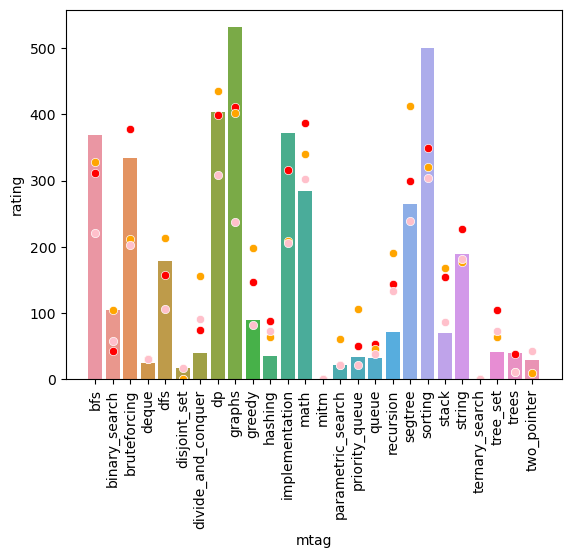

In [220]:
ax = sns.barplot(x='mtag',y='rating',data=q1)
sns.scatterplot(data=junhyuk_mtag,x='mtag',y='rating',ax=ax,color='red')
sns.scatterplot(data=kkj,x='mtag',y='rating',ax=ax,color='orange')
sns.scatterplot(data=hj,x='mtag',y='rating',ax=ax,color='pink')
plt.xticks(rotation=90)
plt.show()

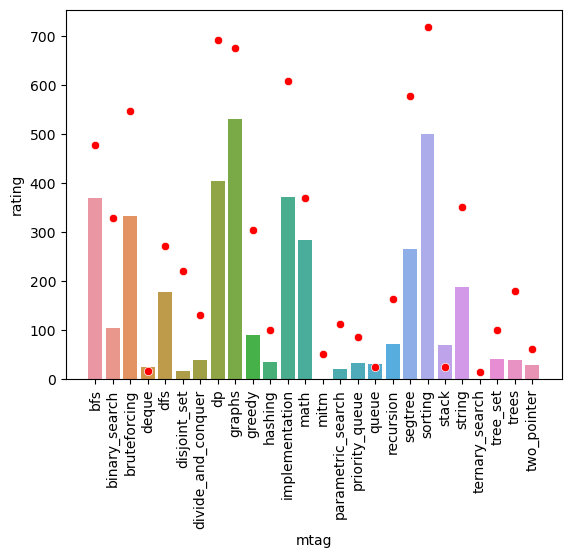

In [159]:
ax = sns.barplot(x='mtag',y='rating',data=q1)
sns.scatterplot(data=samsung_user,x='mtag',y='rating',ax=ax,color='red')
plt.xticks(rotation=90)
plt.show()

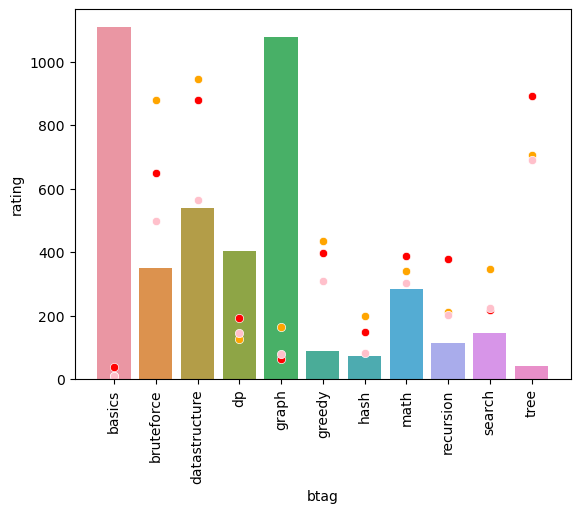

In [243]:
show_btag_barplot(samsung_ele)

## 3. 네이버

In [169]:
naver = all_merge_corpor[all_merge_corpor['corporation_name']=='네이버']
naver

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,voted_users,sprout,average_tries,corporation_name,mtag
16941,dlstj0923,4149,1.0,20,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,817,146,False,6.5789,네이버,
16944,dlstj0923,10430,1.0,1,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,148059,5,False,1.8965,네이버,
16947,dlstj0923,10718,1.0,1,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,176145,5,False,1.5410,네이버,
16950,dlstj0923,10926,1.0,1,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,81198,4,False,1.9531,네이버,
16953,dlstj0923,1648,1.0,18,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,1084,106,False,1.7887,네이버,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305300,sawon49,16707,0.0,19,167.0,0,0,5,2021-06-19T00:00:00.000Z,5212.028948,56,12,False,3.0000,네이버,
305302,sawon49,16924,1.0,9,167.0,0,0,5,2021-06-19T00:00:00.000Z,5212.028948,724,14,False,2.5221,네이버,
305304,sawon49,7620,0.0,16,167.0,0,0,5,2021-06-19T00:00:00.000Z,5212.028948,140,10,False,7.1571,네이버,
305306,sawon49,18428,1.0,11,167.0,0,0,5,2021-06-19T00:00:00.000Z,5212.028948,2901,36,False,2.3020,네이버,


In [173]:
# show_rating(naver)

In [172]:
# show_rating_problem_count(naver)

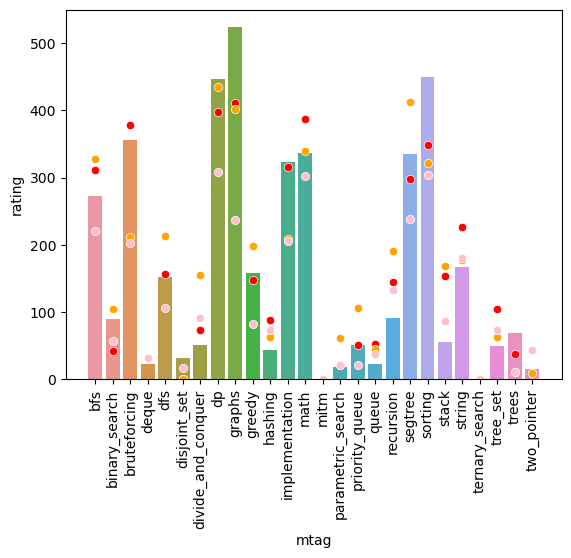

In [222]:
show_mtag_barplot(naver)

## 2. 카카오

In [181]:
kakao = ALL_MERGE[ALL_MERGE['corporation_name']=='카카오']
kakao

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,voted_users,sprout,average_tries,corporation_name,mtag
3291,WeissBlume,4149,1.0,20,2693.0,33,24,541,2021-06-19T00:00:00.000Z,23803.842104,817,146,False,6.5789,카카오,
3292,WeissBlume,1067,1.0,20,2693.0,33,24,541,2021-06-19T00:00:00.000Z,23803.842104,1037,144,False,1.8611,카카오,
3293,WeissBlume,10430,1.0,1,2693.0,33,24,541,2021-06-19T00:00:00.000Z,23803.842104,148059,5,False,1.8965,카카오,
3294,WeissBlume,10718,1.0,1,2693.0,33,24,541,2021-06-19T00:00:00.000Z,23803.842104,176145,5,False,1.5410,카카오,
3295,WeissBlume,10926,1.0,1,2693.0,33,24,541,2021-06-19T00:00:00.000Z,23803.842104,81198,4,False,1.9531,카카오,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305439,joonie811,1301,0.0,13,121.0,0,1,1,2021-06-19T00:00:00.000Z,3306.659828,281,16,False,3.2776,카카오,
305957,justgu,11729,1.0,10,4.0,0,0,1,2021-06-19T00:00:00.000Z,178.962629,30192,128,False,1.9899,카카오,
305958,justgu,2098,1.0,15,4.0,0,0,1,2021-06-19T00:00:00.000Z,178.962629,6970,8,False,3.6914,카카오,
305959,justgu,13023,1.0,11,4.0,0,0,1,2021-06-19T00:00:00.000Z,178.962629,7576,95,False,3.4884,카카오,


In [178]:
# show_rating_problem(kakao)

In [179]:
#show_rating_problem_count(kakao)

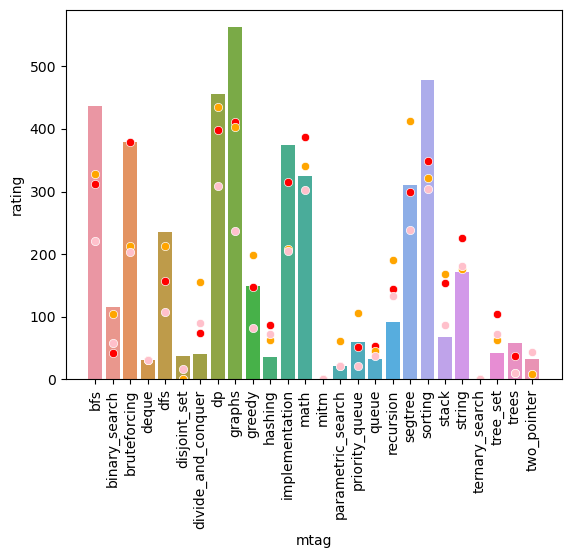

In [221]:
show_mtag_barplot(kakao)

## 4. 삼성SDS

In [183]:
samsung_sds = ALL_MERGE[ALL_MERGE['corporation_name']=='삼성SDS']
samsung_sds

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,voted_users,sprout,average_tries,corporation_name,mtag
26383,handsks,4149,0.0,20,414.0,0,0,1,2021-06-19T00:00:00.000Z,7689.760544,817,146,False,6.5789,삼성SDS,
26384,handsks,1126,1.0,18,414.0,0,0,1,2021-06-19T00:00:00.000Z,7689.760544,1482,159,False,3.8536,삼성SDS,
26385,handsks,1000,1.0,1,414.0,0,0,1,2021-06-19T00:00:00.000Z,7689.760544,246030,23,True,2.4865,삼성SDS,
26386,handsks,10871,1.0,1,414.0,0,0,1,2021-06-19T00:00:00.000Z,7689.760544,116166,69,True,1.8332,삼성SDS,
26387,handsks,10872,1.0,1,414.0,0,0,1,2021-06-19T00:00:00.000Z,7689.760544,66622,59,True,1.8700,삼성SDS,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305301,sawon49,16707,0.0,19,167.0,0,0,5,2021-06-19T00:00:00.000Z,5212.028948,56,12,False,3.0000,삼성SDS,
305303,sawon49,16924,1.0,9,167.0,0,0,5,2021-06-19T00:00:00.000Z,5212.028948,724,14,False,2.5221,삼성SDS,
305305,sawon49,7620,0.0,16,167.0,0,0,5,2021-06-19T00:00:00.000Z,5212.028948,140,10,False,7.1571,삼성SDS,
305307,sawon49,18428,1.0,11,167.0,0,0,5,2021-06-19T00:00:00.000Z,5212.028948,2901,36,False,2.3020,삼성SDS,


In [185]:
# show_rating_problem(samsung_sds)

In [186]:
# show_rating_problem_count(samsung_sds)

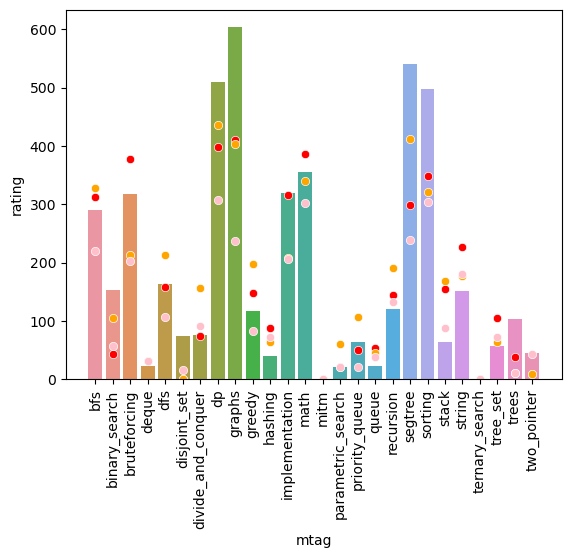

In [223]:
show_mtag_barplot(samsung_sds)

## 5. LG_CNS

In [188]:
lg_cns = ALL_MERGE[ALL_MERGE['corporation_name']=='LG_CNS']
lg_cns

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,voted_users,sprout,average_tries,corporation_name,mtag
16940,dlstj0923,4149,1.0,20,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,817,146,False,6.5789,LG_CNS,
16943,dlstj0923,10430,1.0,1,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,148059,5,False,1.8965,LG_CNS,
16946,dlstj0923,10718,1.0,1,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,176145,5,False,1.5410,LG_CNS,
16949,dlstj0923,10926,1.0,1,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,81198,4,False,1.9531,LG_CNS,
16952,dlstj0923,1648,1.0,18,1249.0,55,54,10,2021-06-19T00:00:00.000Z,13778.361228,1084,106,False,1.7887,LG_CNS,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304323,dataenggu,20366,1.0,13,201.0,2,1,1,2021-06-19T00:00:00.000Z,6084.118293,718,42,False,3.2521,LG_CNS,
304324,dataenggu,3101,1.0,13,201.0,2,1,1,2021-06-19T00:00:00.000Z,6084.118293,277,20,False,3.5632,LG_CNS,
304325,dataenggu,17297,1.0,13,201.0,2,1,1,2021-06-19T00:00:00.000Z,6084.118293,280,26,False,1.9214,LG_CNS,
304326,dataenggu,17841,1.0,12,201.0,2,1,1,2021-06-19T00:00:00.000Z,6084.118293,116,18,False,2.5086,LG_CNS,


In [189]:
# show_rating_problem(lg_cns)

In [190]:
# show_rating_problem_count(lg_cns)

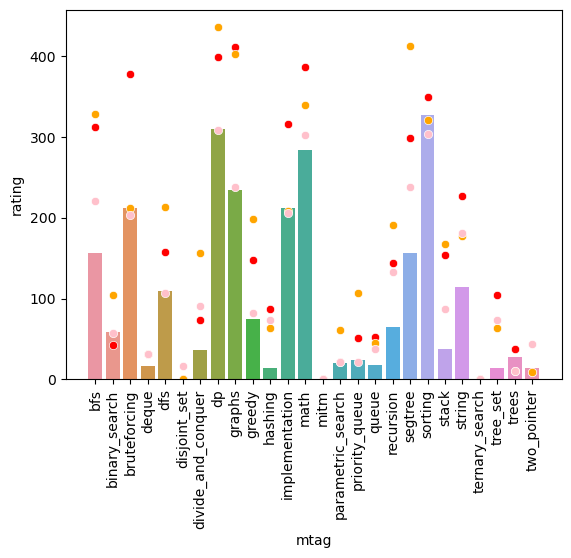

In [224]:
show_mtag_barplot(lg_cns)

## 6. LG전자

In [193]:
lg_ele = ALL_MERGE[ALL_MERGE['corporation_name']=='LG전자']
lg_ele

,user_id,problem_id,answer_code,level,solved_count,follower_count,following_count,max_streak,joined_date,rating,correct_users,voted_users,sprout,average_tries,corporation_name,mtag
45635,plum,4149,0.0,20,333.0,0,0,1,2021-06-19T00:00:00.000Z,4499.448339,817,146,False,6.5789,LG전자,
45636,plum,10430,1.0,1,333.0,0,0,1,2021-06-19T00:00:00.000Z,4499.448339,148059,5,False,1.8965,LG전자,
45637,plum,10718,1.0,1,333.0,0,0,1,2021-06-19T00:00:00.000Z,4499.448339,176145,5,False,1.5410,LG전자,
45638,plum,10926,1.0,1,333.0,0,0,1,2021-06-19T00:00:00.000Z,4499.448339,81198,4,False,1.9531,LG전자,
45639,plum,1000,1.0,1,333.0,0,0,1,2021-06-19T00:00:00.000Z,4499.448339,246030,23,True,2.4865,LG전자,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305928,roonm813,20116,1.0,8,233.0,8,8,6,2021-06-19T00:00:00.000Z,6979.751423,285,11,False,2.8105,LG전자,
305930,roonm813,23291,1.0,16,233.0,8,8,6,2021-06-19T00:00:00.000Z,6979.751423,1299,73,False,1.7983,LG전자,
305932,roonm813,2733,0.0,13,233.0,8,8,6,2021-06-19T00:00:00.000Z,6979.751423,175,26,False,5.6343,LG전자,
305934,roonm813,7682,1.0,11,233.0,8,8,6,2021-06-19T00:00:00.000Z,6979.751423,990,28,False,3.4394,LG전자,


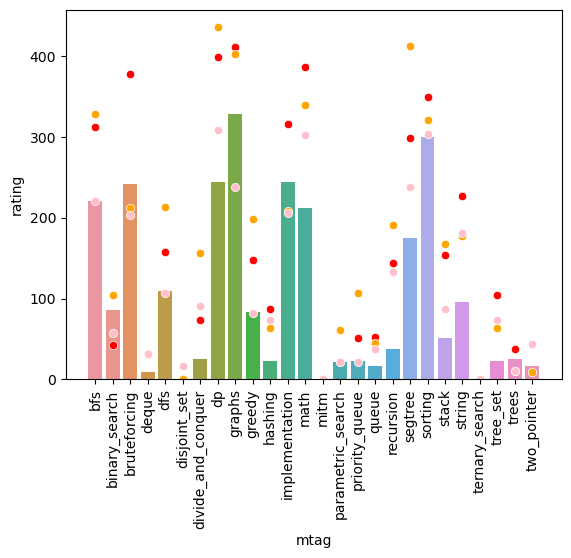

In [225]:
show_mtag_barplot(lg_ele)